<a href="https://colab.research.google.com/github/guptanmol02/Heart-failure-Prediction-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset

In [ ]:
import pandas as pd
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Initial analysis on the dataset

In [ ]:
print("shape of the dataset:",df.shape)

shape of the dataset: (299, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Examining missing values

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

seperating numerical values and categorical values

In [ ]:
numeric_var=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]
categoric_var=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

Examining statistics of variables

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


numerical values histogram

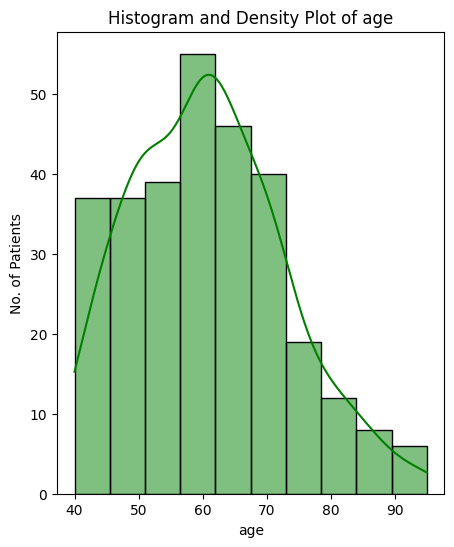

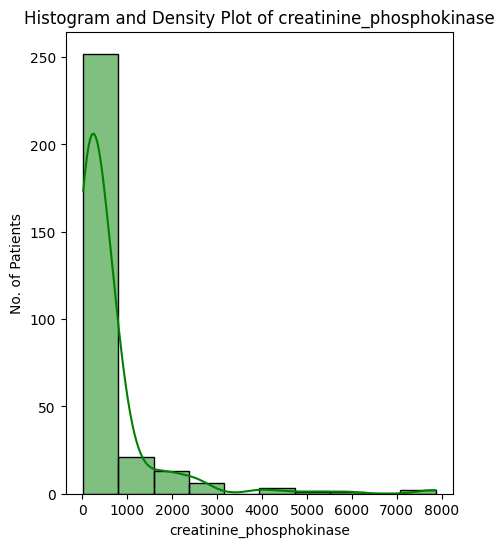

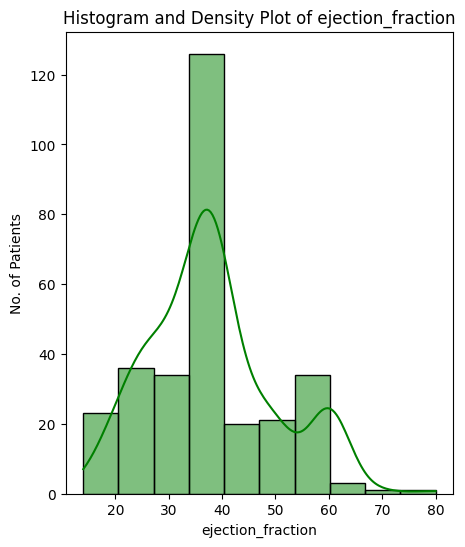

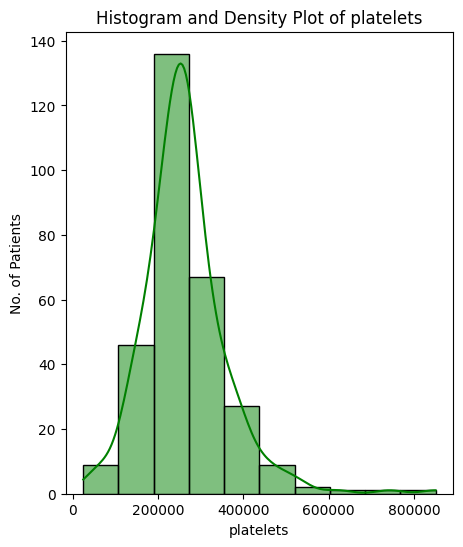

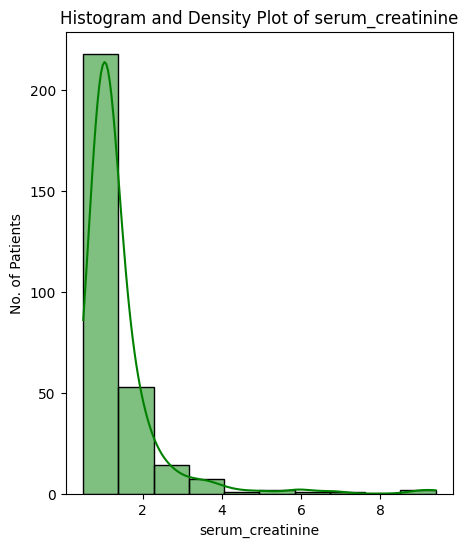

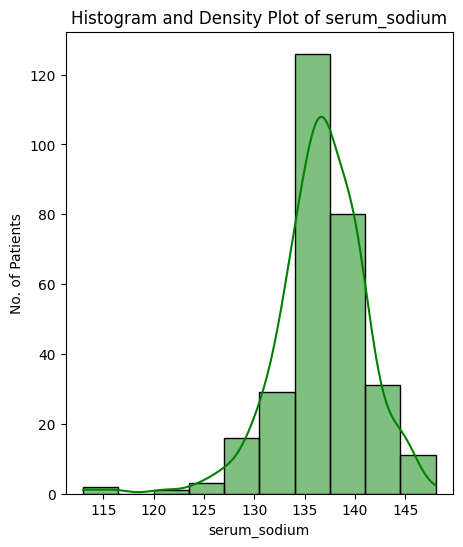

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for x in ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]:
  plt.figure(figsize=(5,6))
  sns.histplot(df[x], kde=True, bins=10,color='green')
  plt.title(f'Histogram and Density Plot of {x}')
  plt.xlabel(x)
  plt.ylabel('No. of Patients')
  plt.show()

categorical values piechart

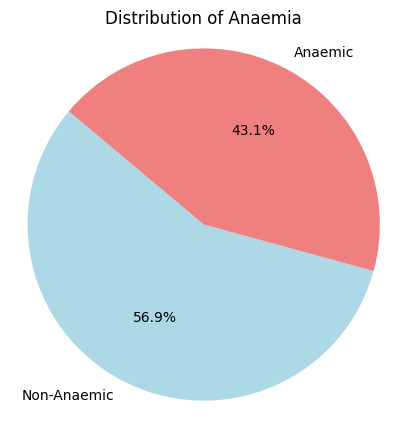

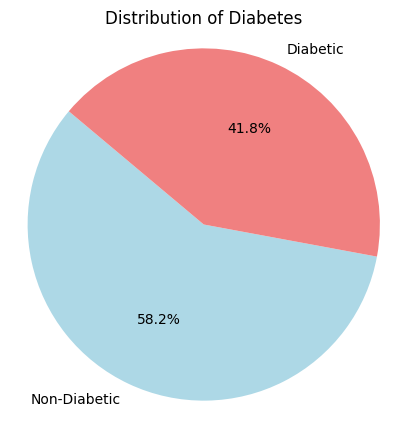

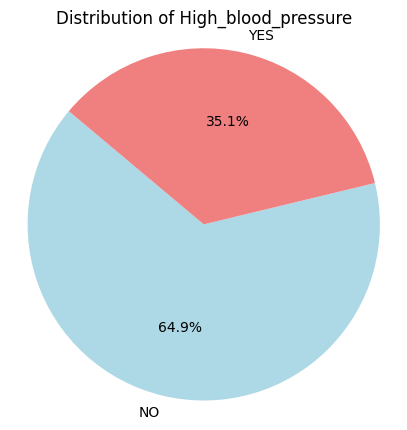

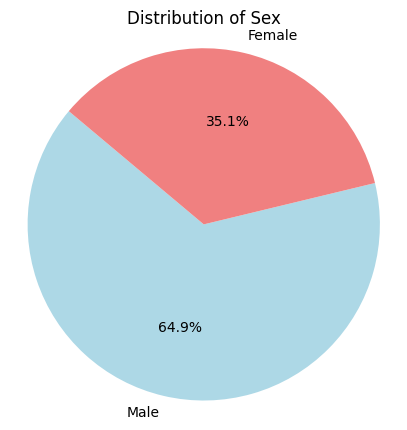

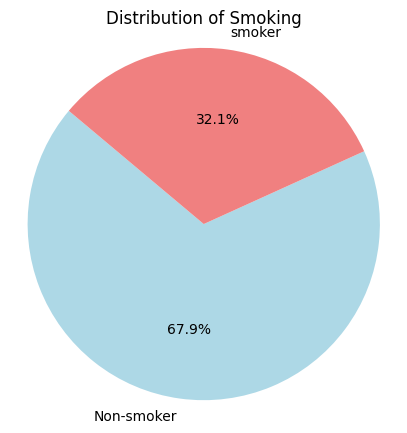

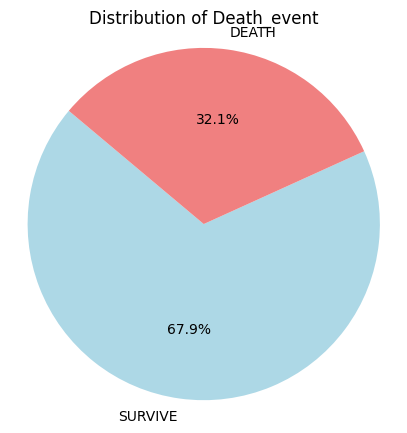

In [ ]:
categoric_var=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
for column in categoric_var:
    # Calculate the distribution of the current column
    counts = df[column].value_counts()
    # Create labels and sizes for the pie chart
    if column == 'anaemia':
        labels = counts.index.map({0: 'Non-Anaemic', 1: 'Anaemic'})
        colors = ['lightblue', 'lightcoral']
    elif column == 'diabetes':
        labels = counts.index.map({0: 'Non-Diabetic', 1: 'Diabetic'})
        colors = ['lightblue', 'lightcoral']
    elif column == 'high_blood_pressure':
        labels = counts.index.map({0: 'NO', 1: 'YES'})
        colors = ['lightblue', 'lightcoral']
    elif column == 'sex':
        labels = counts.index.map({0: 'Female', 1: 'Male'})
        colors = ['lightblue', 'lightcoral']
    elif column == 'smoking':
        labels = counts.index.map({0: 'Non-smoker', 1: 'smoker'})
        colors = ['lightblue', 'lightcoral']
    elif column == 'DEATH_EVENT':
        labels = counts.index.map({0: 'SURVIVE', 1: 'DEATH'})
        colors = ['lightblue', 'lightcoral']
    sizes = counts.values
# Create the pie chart
    plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    # Display the pie chart
    plt.show()

Analysis with Count plot

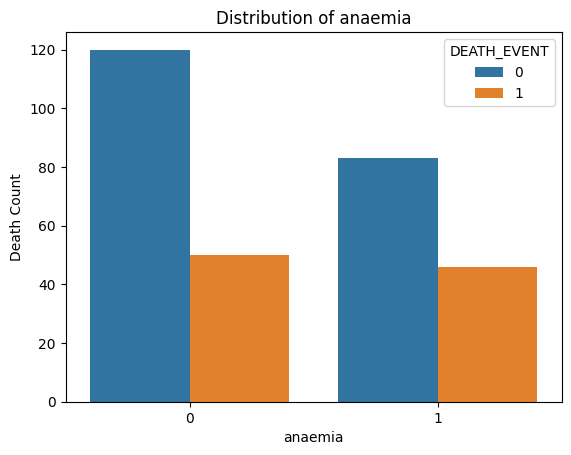

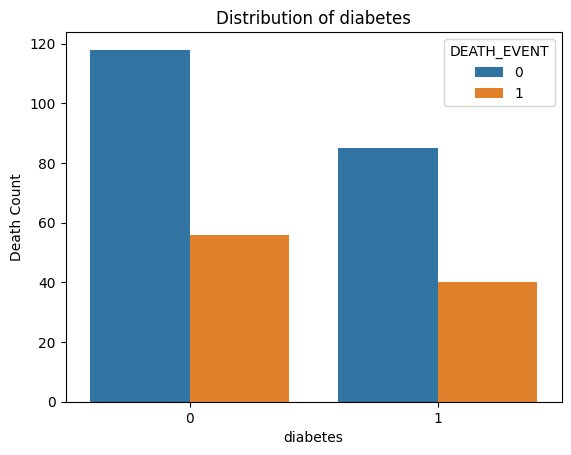

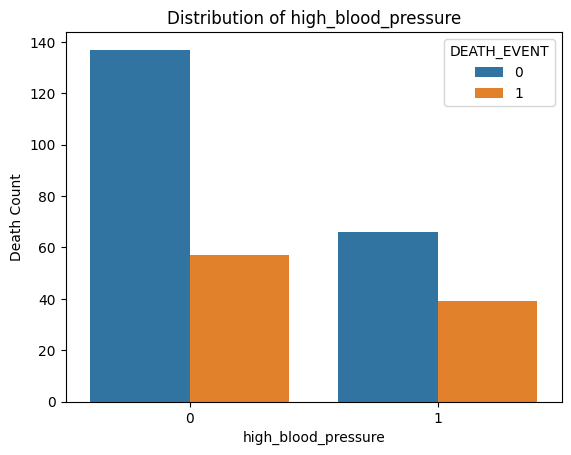

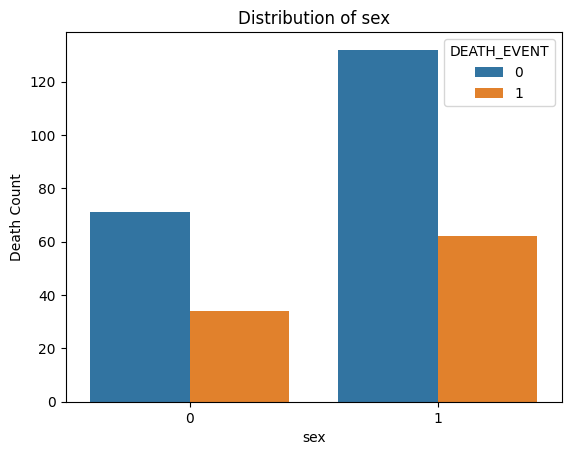

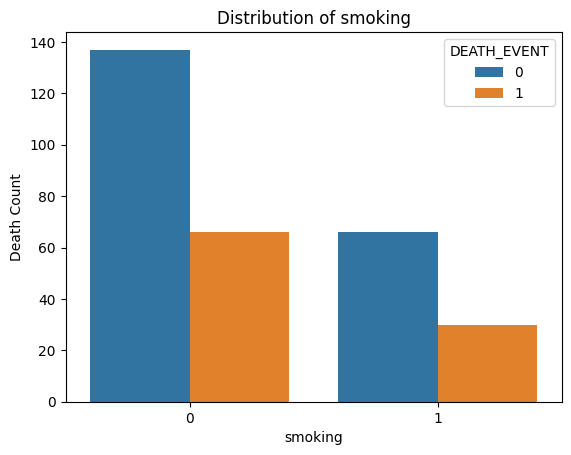

In [ ]:
for i in ["anaemia","diabetes","high_blood_pressure","sex","smoking"]:
  sns.countplot(x=df[i],data=df, hue= "DEATH_EVENT")
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel("Death Count")
  plt.show()

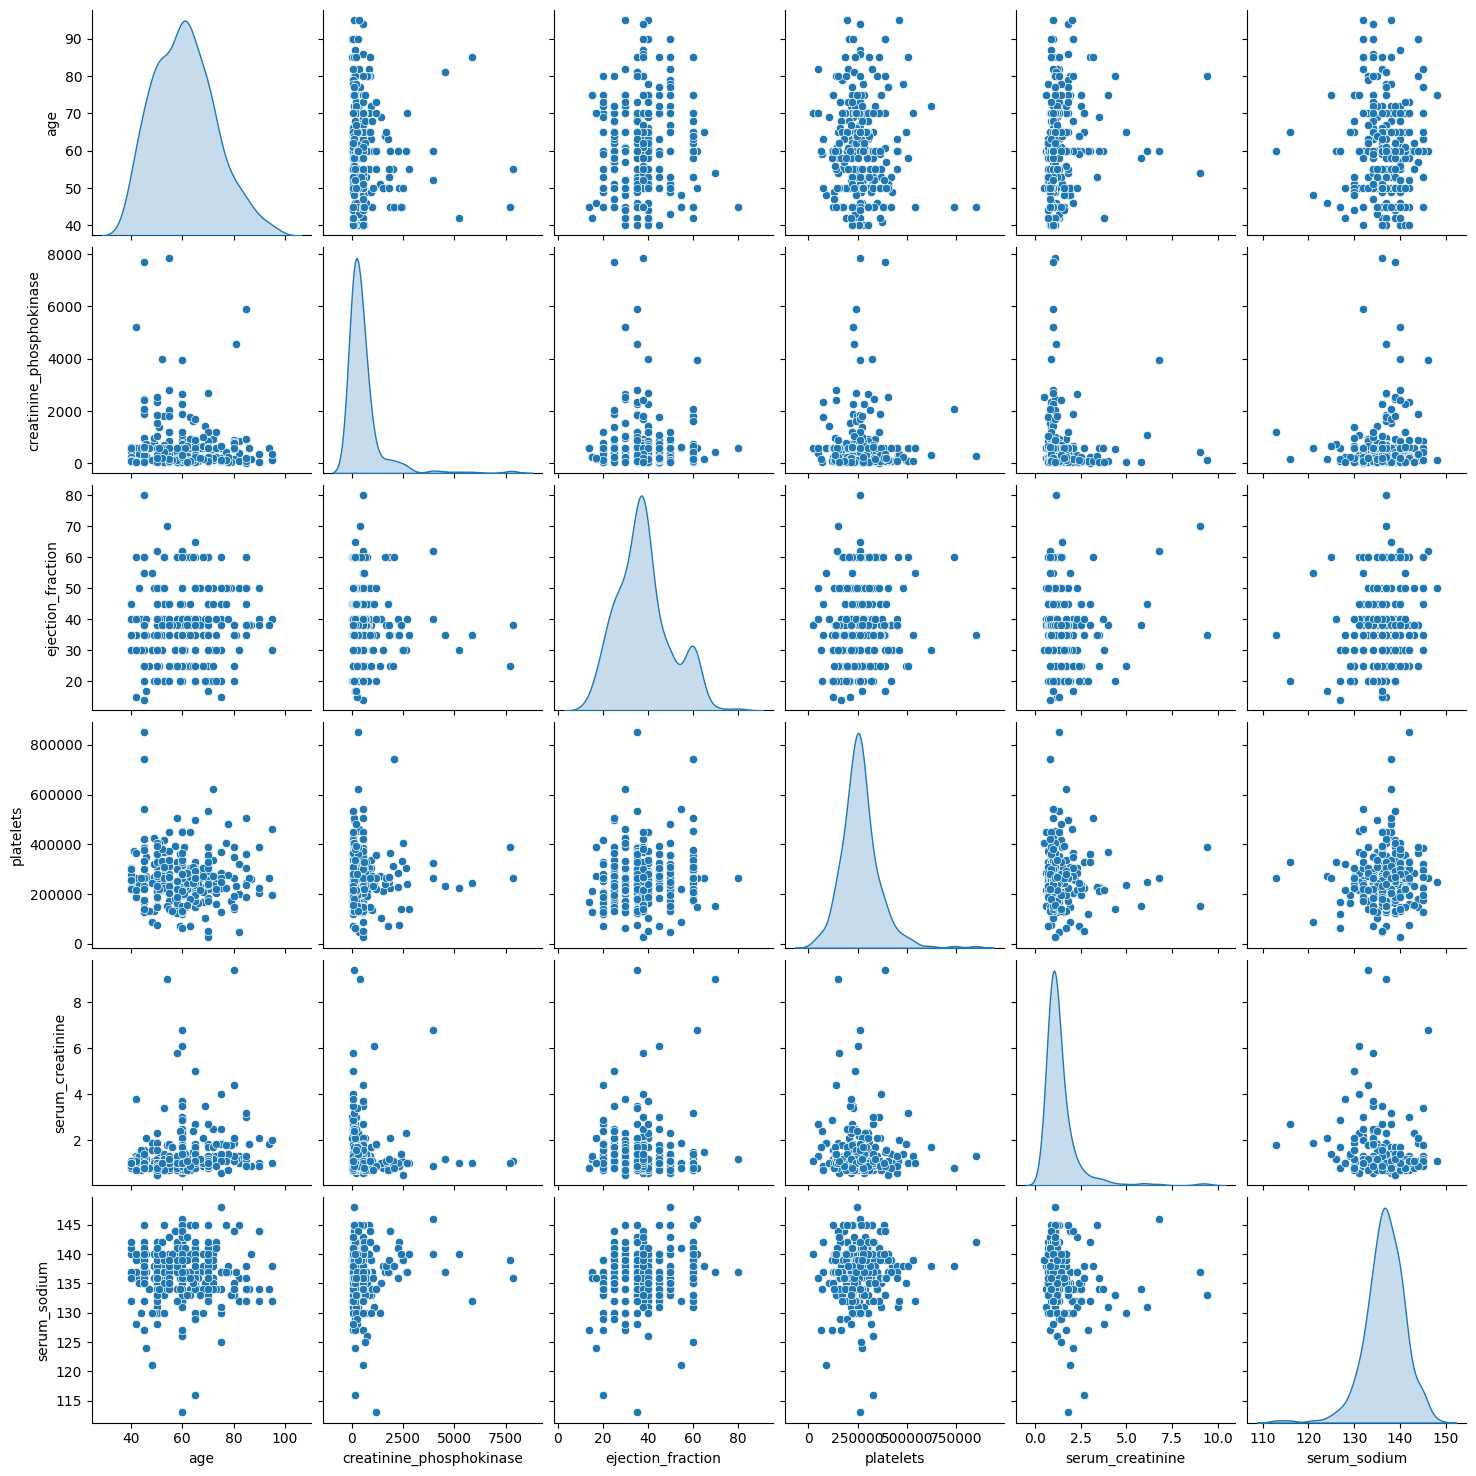

In [ ]:
sns.pairplot(df[numeric_var], diag_kind="kde")
plt.show()

Analysis with Pair plot

finding correlation

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Analysis with heatmap

<Axes: >

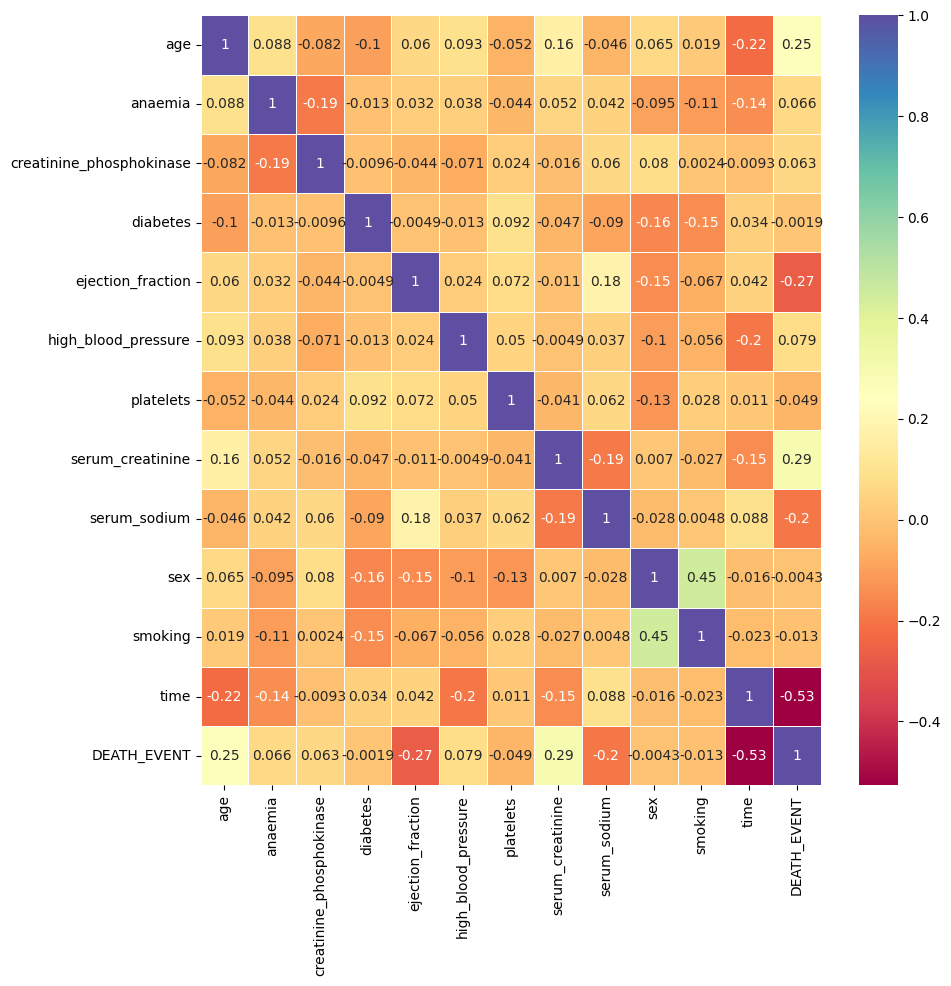

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Spectral", annot= True, linewidths =0.5)

DETECTING OUTLIERS

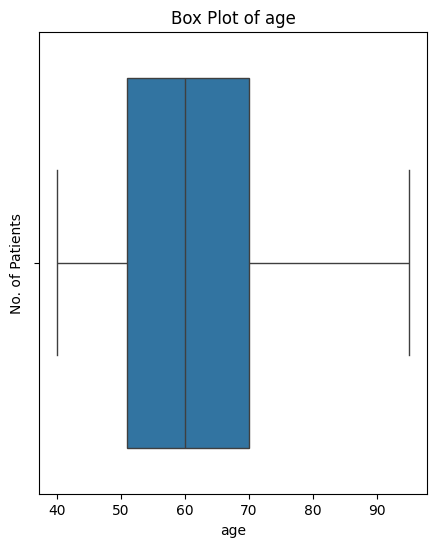

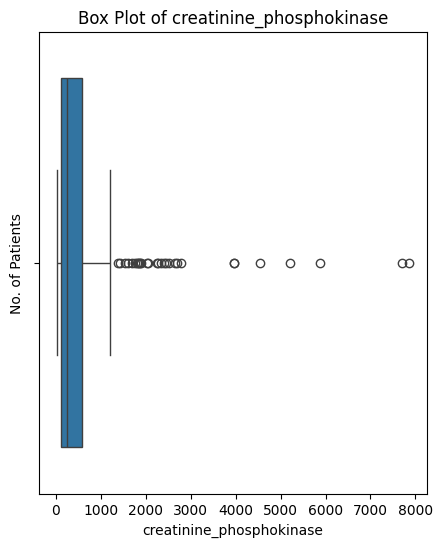

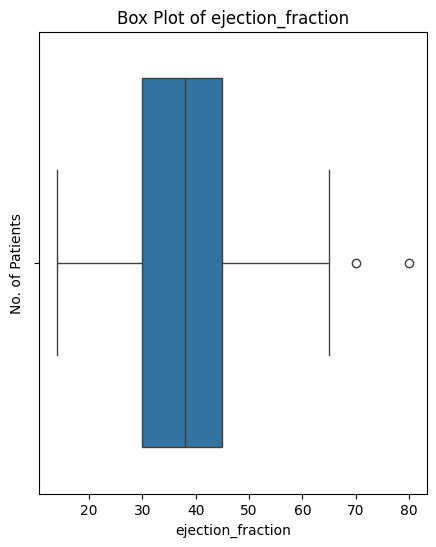

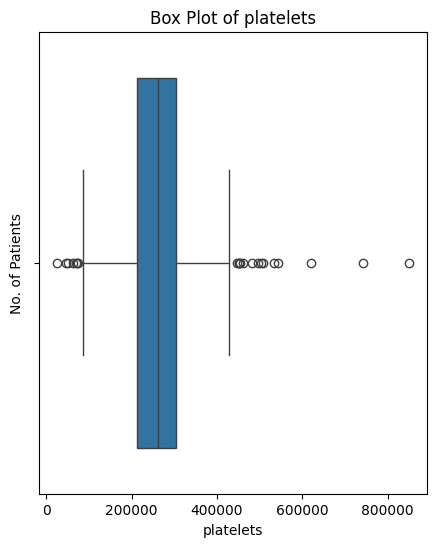

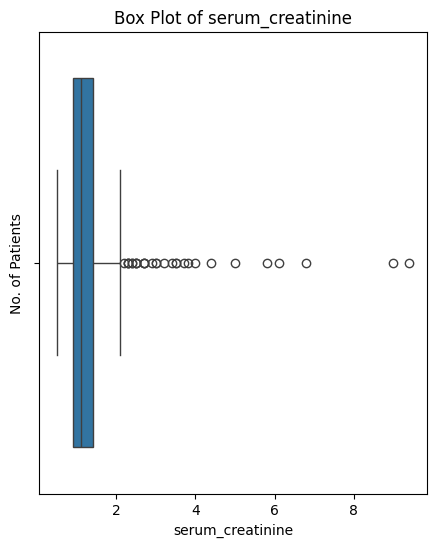

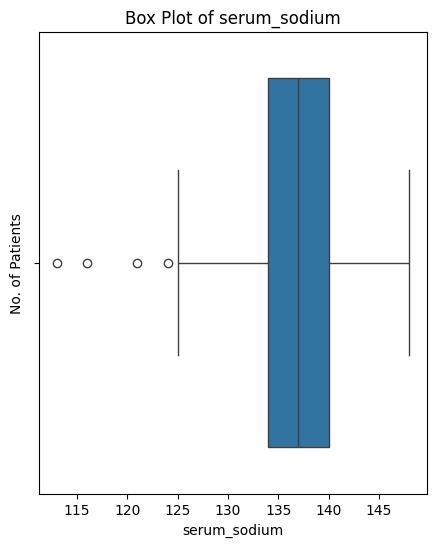

In [ ]:
for i in numeric_var:
    plt.figure(figsize=(5,6))
    sns.boxplot(x=df[i] )
    plt.title(f'Box Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('No. of Patients')
    plt.show()

In [ ]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import numpy as np

In [ ]:
z_scores_creatinine_phosphokinase= zscore(df["creatinine_phosphokinase"])
for threshold in range(1,4):
  print("Threshold value:{}".format(threshold))
  print("Number of outliers:{}".format(len(np.where(z_scores_creatinine_phosphokinase > threshold)[0])))
  print("...........................")

Threshold value:1
Number of outliers:26
...........................
Threshold value:2
Number of outliers:11
...........................
Threshold value:3
Number of outliers:7
...........................


In [ ]:
df[z_scores_creatinine_phosphokinase>2][["creatinine_phosphokinase"]]

,creatinine_phosphokinase
1,7861
38,2656
52,3964
60,7702
72,5882
103,5209
134,4540
171,3966
227,2794
250,2522


In [ ]:
df[z_scores_creatinine_phosphokinase>2].creatinine_phosphokinase.min()

2522

In [ ]:
df[df["creatinine_phosphokinase"].astype(int)<2522].creatinine_phosphokinase.max()


2442

In [ ]:
winsorize_percentile_creatinine_phosphokinase = (stats.percentileofscore(df["creatinine_phosphokinase"], 2442)) / 100
print(winsorize_percentile_creatinine_phosphokinase)

0.963210702341137


In [ ]:
1 - winsorize_percentile_creatinine_phosphokinase



0.03678929765886296

In [ ]:
creatinine_phosphokinase_winsorize = winsorize(df.creatinine_phosphokinase, (0, (1 - winsorize_percentile_creatinine_phosphokinase)))

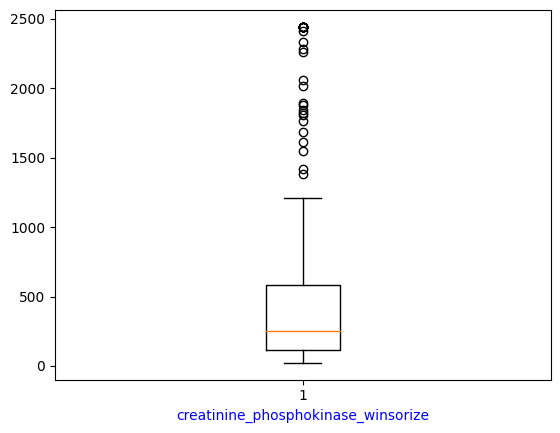

In [ ]:
plt.boxplot(creatinine_phosphokinase_winsorize)
plt.xlabel("creatinine_phosphokinase_winsorize", color = "b")
plt.show()

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# training set
X = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

# STANDARIZED X VARIABLES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 (or any other suitable value)

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Model Performance for Training Sets: 

ACCURACY SCORE:  0.8702928870292888
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       168
           1       0.81      0.73      0.77        71

    accuracy                           0.87       239
   macro avg       0.85      0.83      0.84       239
weighted avg       0.87      0.87      0.87       239

CONFUSION MATRIX: 
 [[156  12]
 [ 19  52]]


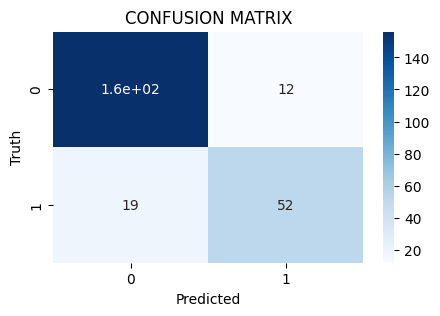

Model Performance for Testing Sets: 

ACCURACY SCORE:  0.8
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

CONFUSION MATRIX: 
 [[34  1]
 [11 14]]


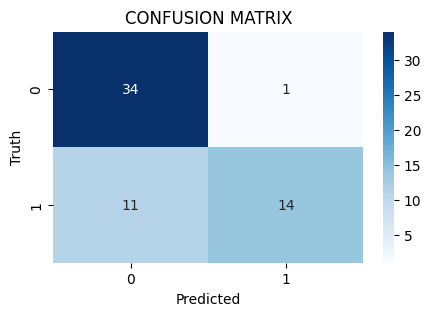

In [ ]:
# Predict on the training and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

## Calculate the metrices training sets
print("Model Performance for Training Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_train, y_train_pred))
log= metrics.confusion_matrix(y_train, y_train_pred)
print("CONFUSION MATRIX: \n",log)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(log, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

# Calculate the metrices test sets
print("Model Performance for Testing Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_test_pred))
log1= metrics.confusion_matrix(y_test, y_test_pred)
print("CONFUSION MATRIX: \n",log1)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(log1, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()